## How look bitrate in one requests set?

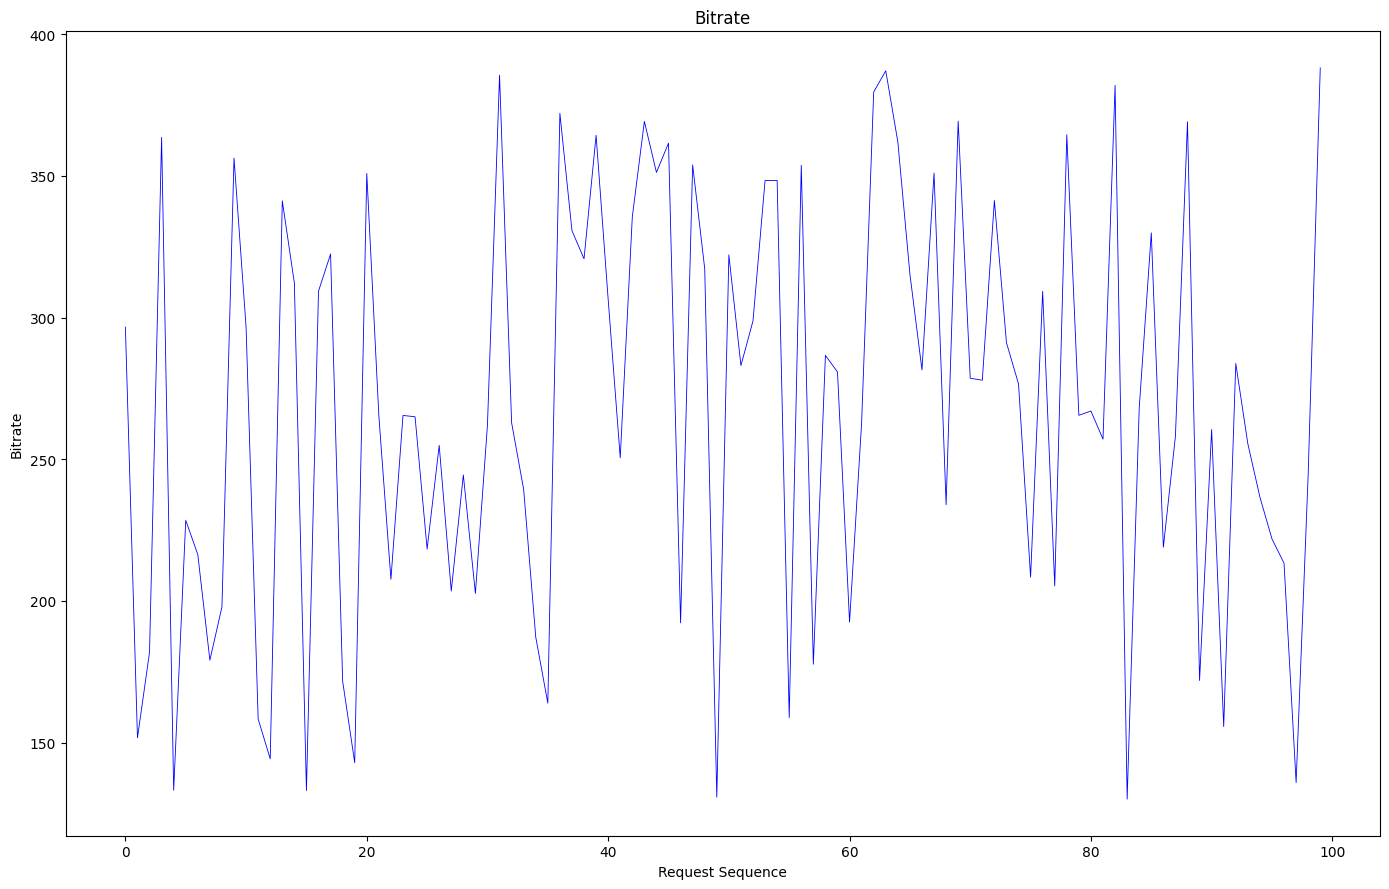

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

data = pd.read_csv("Euro28/request-set_1/requests.csv")

plt.figure(figsize=(14,9))
plt.plot(data["bitrate"], color="blue", linewidth=0.6)
plt.xlabel("Request Sequence")
plt.ylabel("Bitrate")
plt.title("Bitrate")
plt.tight_layout()
plt.show()

## All bitrates on one plot

In [ ]:
plt.figure(figsize=(14,9))

for i in os.listdir("Euro28"):
    data = pd.read_csv(f"Euro28/{i}/requests.csv")
    plt.plot(data["bitrate"], linewidth=0.6, label=i)
    plt.xlabel("Request Sequence")
    plt.ylabel("Bitrate")
    plt.title("Bitrate")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.5), ncol=2)
plt.tight_layout()
plt.show()

## Load data

In [2]:
from helpers.import_data import import_data

data, results = import_data("Euro28")
data = data.reshape(100,300)
#results = results[:, 3]

#print(data)
print(data.shape)
#print(results.shape)


(100, 300)


## Learning 

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(data, results, test_size=0.2, random_state=1410)

mlp = MultiOutputRegressor(MLPRegressor(hidden_layer_sizes=10, batch_size=20, max_iter=1000, random_state=1410))

model = mlp.fit(X_train, y_train)

y_pred = model.predict(X_test)

#print(f"Real data: {y_test}")
#print(f"Predicted data: {y_pred}")


In [ ]:
from sklearn.metrics import mean_squared_error
fig, ax = plt.subplots(2,2, figsize=(14,9))

# Highest Slot
ax[0,0].plot(y_test[:,0], color="red", linewidth=0.6, label="Real data")
ax[0,0].plot(y_pred[:,0], color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data - highestSlot")
ax[0,0].set_ylabel("highestSlot")
ax[0,0].set_title(f"Highest Slot Prediction (MAE: {round(mean_squared_error(y_test[:,0], y_pred[:,0]), 2)})")
ax[0,0].grid()
ax[0,0].legend()

# Average Highest Slot
ax[0,1].plot(y_test[:,1], color="red", linewidth=0.6, label="Real data")
ax[0,1].plot(y_pred[:,1], color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data - avgHighestSlot")
ax[0,1].set_ylabel("avgHighestSlot")
ax[0,1].set_title(f"Average Highest Slot Prediction (MAE: {round(mean_squared_error(y_test[:,1], y_pred[:,1]), 2)})")
ax[0,1].grid()
ax[0,1].legend()

# Sum of Slots
ax[1,0].plot(y_test[:,2], color="red", linewidth=0.6, label="Real data")
ax[1,0].plot(y_pred[:,2], color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data - sumOfSlots")
ax[1,0].set_ylabel("sumOfSlots")
ax[1,0].set_title(f"Sum of Slots Predictions (MAE: {round(mean_squared_error(y_test[:,2], y_pred[:,2]), 2)})")
ax[1,0].grid()
ax[1,0].legend()

# Average Active Transceivers
ax[1,1].plot(y_test[:,0], color="red", linewidth=0.6, label="Real data")
ax[1,1].plot(y_pred[:,0], color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data - avgActiveTransceivers")
ax[1,1].set_ylabel("avgActiveTransceivers")
ax[1,1].set_title(f"Average Active Transceivers Prediction (MAE: {round(mean_squared_error(y_test[:,3], y_pred[:,3]), 2)})")
ax[1,1].grid()
ax[1,1].legend()

plt.tight_layout()
plt.show()

## Many models comparision between each of them

In [ ]:
from import_data import import_data
data, results = import_data("Euro28")

data = data.reshape(100,300)
results = results[:, 3]

#print(data.shape)

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(data, results, test_size=0.2, random_state=1410)

# MLP
mlp = MLPRegressor(hidden_layer_sizes=5, batch_size=10, random_state=1410, warm_start=True)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)

# KNN
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
mae_knn = mean_absolute_error(y_test, y_pred_knn)

# SVR
svr = SVR(kernel="poly")
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)

# RFR
rfr = RandomForestRegressor(random_state=1410)
rfr.fit(X_train, y_train)
y_pred_rfr = rfr.predict(X_test)
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)


In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(14,9))

# MLP
ax[0,0].plot(y_pred_mlp, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[0,0].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[0,0].set_ylabel("avgHighestSlot")
ax[0,0].set_title(f"MLP Regressor (MAE: {round(mae_mlp, 2)})")
ax[0,0].legend()
ax[0,0].grid()

# KNN
ax[0,1].plot(y_pred_knn, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[0,1].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[0,1].set_ylabel("avgHighestSlot")
ax[0,1].set_title(f"KNN Regressor (MAE: {round(mae_knn, 2)})")
ax[0,1].legend()
ax[0,1].grid()

# SVR
ax[1,0].plot(y_pred_svr, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[1,0].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[1,0].set_ylabel("avgHighestSlot")
ax[1,0].set_title(f"SVR Regressor (MAE: {round(mae_svr, 2)})")
ax[1,0].legend()
ax[1,0].grid()

# Random Forest Regressor
ax[1,1].plot(y_pred_rfr, color="blue", linewidth=0.8, linestyle="dotted", label="Predicted data")
ax[1,1].plot(y_test, color="red", linewidth=0.6, label="Real data")
ax[1,1].set_ylabel("avgHighestSlot")
ax[1,1].set_title(f"Random Forest Regressor (MAE: {round(mae_rfr, 2)})")
ax[1,1].legend()
ax[1,1].grid()

plt.tight_layout()
plt.show()